# IMDB Data Analysis

This analysis considers the elements that distinguish certain movies from others in terms of success. In order to ensure a high return, we would like to study what kind of movies are more profitable.

We use the rate of return on investment(ROI) as the response variable in this analysis, and we concentrate on how the other factors in the IMDB movie dataset affect the response variable. The findings may aid Sussex Budget Productions in unravelling the formula for creating a box office hit movie.

In [1]:
#standard imports for when working with pandas
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

#defining metadata file path.
myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

In [2]:
#looking at the first few rows of the data
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
#checking the number of rows(movies) and columns(factors) in the dataframe
df.shape

(5043, 28)

In [4]:
#checking unique values for every factor in the dataset.
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [5]:
#observing the statistical summary of the dataframe
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Data Description

The dataset has 28 factors for 5043 movies from 65 different countries in 47 languages.These movies were produced in 914 different genres, starring thousands of actors/actresses, and were overseen by 2938 different directors over the course of a century(1916-2016).

### Data Cleaning

Discover duplicate records and, if any, eliminate them.

In [6]:
#checking the total number of duplicates in the dataset
if sum(df.duplicated()) > 0:
    print("Duplicate records: "+str(sum(df.duplicated())))
    #deleting duplicate rows
    df = df.drop_duplicates()

Duplicate records: 45


Look for missing values.

In [7]:
df.isna().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

Since there are too many missing values for gross and budget and we want to maintain these variables for the evaluation of profit and rate of return on investment(ROI), we eliminate these rows because imputation will not be effective in this situation as imputing any value will completely alter the results.

In [8]:
#eliminating rows for missing values of gross and budget 
df = df.dropna(subset=['gross', 'budget'])
df.shape

(3857, 28)

Check for any more missing values.

In [9]:
df.isna().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

In [10]:
#determine the percentage of rows with missing values.
(df.isna().any(axis=1).sum()/df.shape[0])*100

3.4742027482499354

As only 3.47% of rows have missing values, we can remove these rows without suffering a significant data loss.

In [11]:
df = df.dropna()
df.shape

(3723, 28)

Reshaping gross and budget factors in millions to improve the clarity of our analysis.

In [12]:
#reshaping gross and budget factors in millions
df['gross'] = df['gross']/1000000
df['budget'] = df['budget']/1000000

For additional analysis, let's add two columns: profit and rate of return on investment(ROI).

In [13]:
#adding columns: profit and rate of ROI
df['profit'] = df['gross']-df['budget']
df['return_rate'] = (df['profit']/df['budget'])*100

Create a Spearman's correlation matrix to identify correlation between columns.

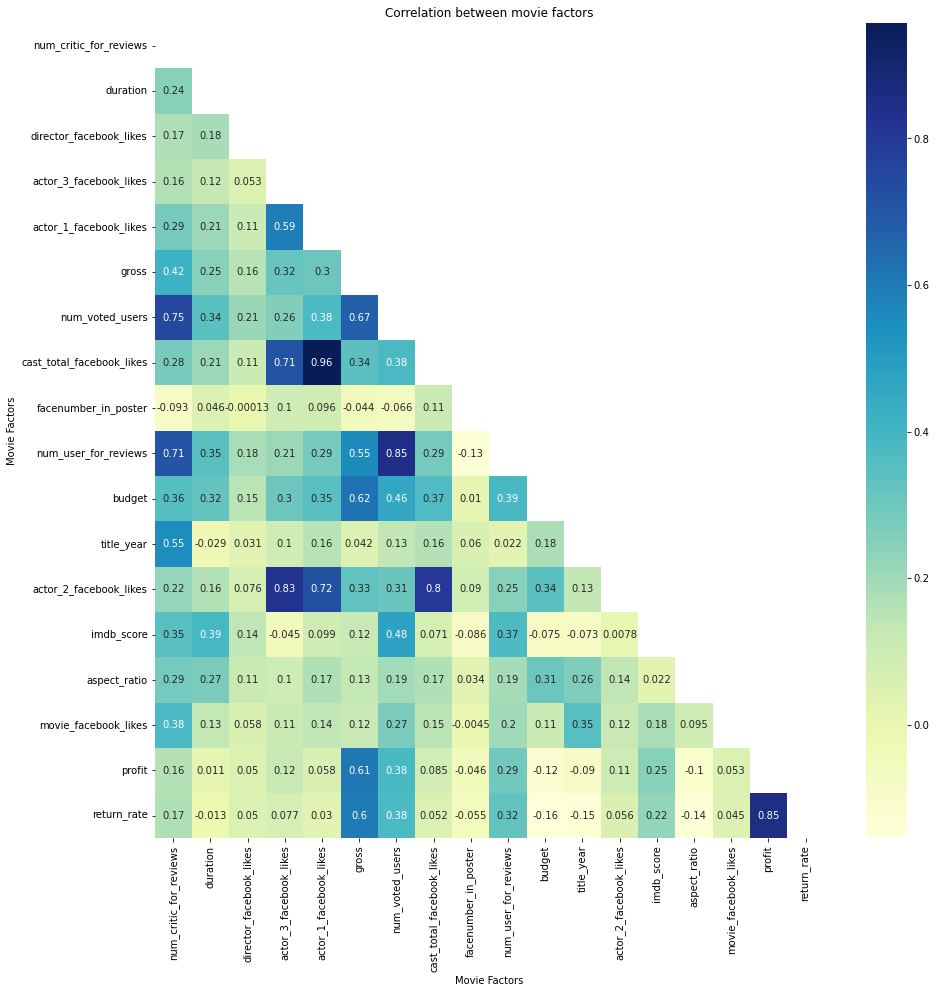

In [14]:
#creating a correlation matrix to identify relevant and unrelated columns
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=mask)
plt.xlabel("Movie Factors")
plt.ylabel("Movie Factors")
plt.title("Correlation between movie factors")
plt.show()

From the correlation matrix we get the following insights:
- 'Budget' and 'Gross' have a strong correlation of 62%, indicating that movies will probably be successful.
- The fact that 'Gross' has a strong correlation with 'num_voted_users'(67%) and a moderate correlation with 'num_user_for_reviews'(55%) suggests that we should try to draw in as many customers as possible in order to boost our earnings.
- The 'facenumber_in_poster' factor can be disregarded because there is almost no correlation(nearly 0) with gross and budget.
- 'cast_total_facebook_likes' is very strongly correlated with 'actor_1_facebook_likes'(96%), and both actor2 and actor3 facebook likes are also highly correlated to the 'cast_total_facebook_likes', so we can discard the factors associated to actors' facebook likes.

We can also drop 'plot_keywords' and 'movie_imdb_link' as these are too diverse and irrelevant.

In [15]:
df = df.drop(['facenumber_in_poster', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'plot_keywords', 'movie_imdb_link'], axis=1)
df.shape

(3723, 24)

### Explanatory Data Analysis

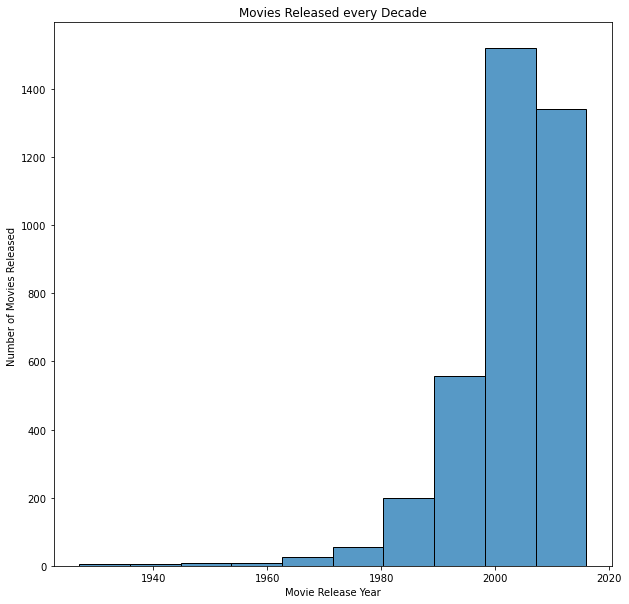

In [16]:
#Histogram plot of movie count by their release year
plt.subplots(figsize=(10,10))
sns.histplot(df['title_year'],bins=10)
plt.xlabel("Movie Release Year")
plt.ylabel("Number of Movies Released ")
plt.title("Movies Released every Decade")
plt.show()

The graph demonstrates that there aren't many records of movies that were released prior to 1980. Since they might not be representative, it is better to get rid of those records. This is as a result of developments in the filmmaking technology and techniques. Also, movies before 1980 are less relevant to today's audiences.

In [17]:
#filtering movies which were released in or after 1980
df = df[df['title_year'] >= 1980] 

We can further filter our data in accordance with our interest in high ROI for a budget of £1.5 million.

In [18]:
#filtering movies to our maximum possible budget of £1.5 million and to our minimum ROI
minimum_roi = 70
df = df[(df['budget'] <= 1.5) & (df['return_rate'] >= minimum_roi)]
df.shape

(100, 24)

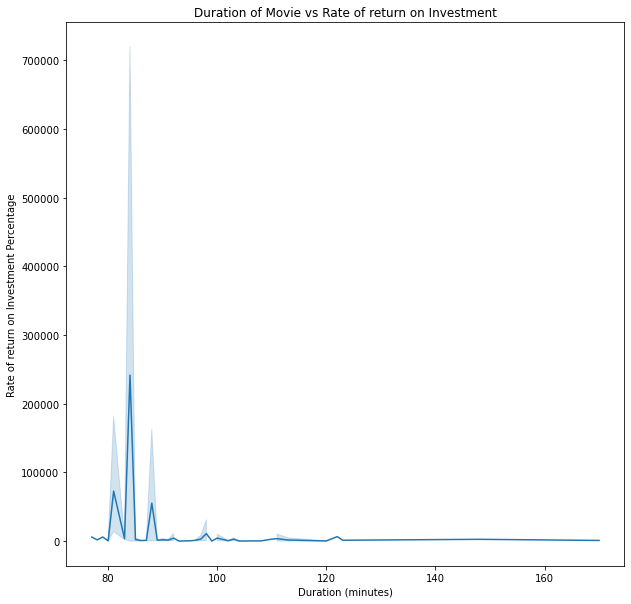

In [19]:
#Line plot of Duration vs Rate of return on Investment
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel("Duration (minutes)")
plt.ylabel("Rate of return on Investment Percentage")
plt.title("Duration of Movie vs Rate of return on Investment")
sns.lineplot(x=df['duration'],y=df['return_rate'])
plt.show()

We might consider producing a movie that lasts between **80 and 90 minutes** because it appears that these lengths have a higher ROI with some fluctuations.

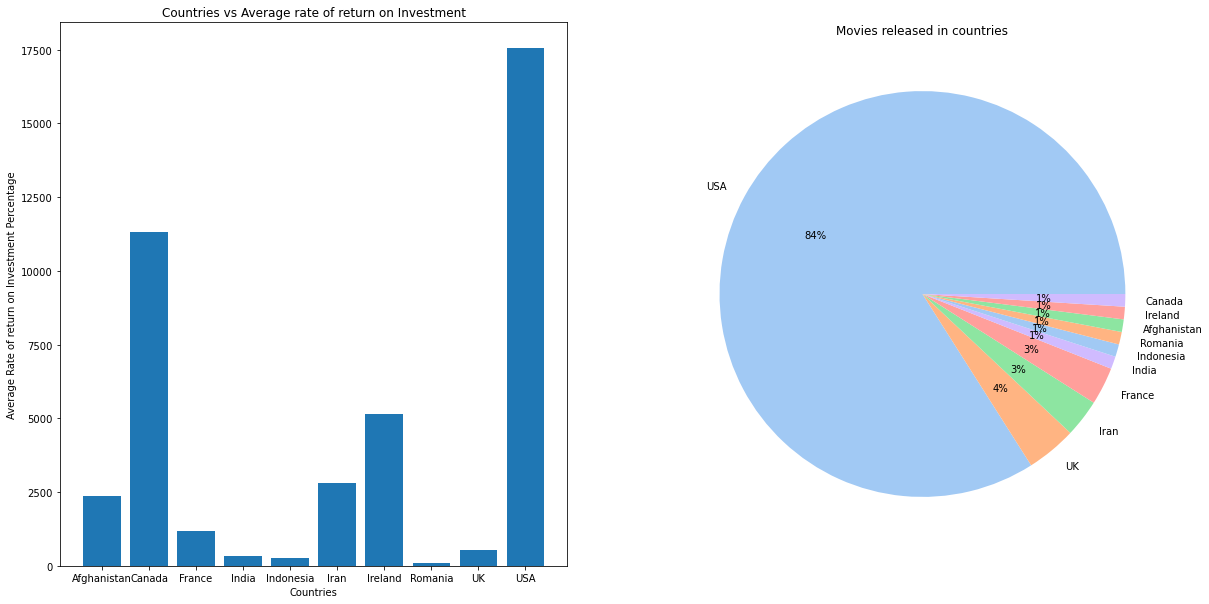

In [20]:
#filtering return rate based on countries
country_roi =df.groupby('country')[['return_rate']].mean()

#plotting horizontally
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

#Bar plot of Countries vs Average rate of return on Investment
ax1.bar(country_roi.index,country_roi['return_rate'])
ax1.set_xlabel("Countries")
ax1.set_ylabel("Average Rate of return on Investment Percentage")
ax1.set_title("Countries vs Average rate of return on Investment")

#Pie plot of movies released in countries
colors = sns.color_palette('pastel')[:5]
ax2.pie(list(df.country.value_counts()), labels = list(df.country.value_counts().index), colors = colors, autopct='%.0f%%')
ax2.set_title("Movies released in countries")
plt.show()

From the above plots, releasing movie in **USA** will be most profitable as the average ROI is very high.

Here, I've sorted the average imdb rating, budget and ROI for all movies by genre. Establish a minimum imdb score and filter based on that. Only films with high ratings are being considered because we are only interested in those.

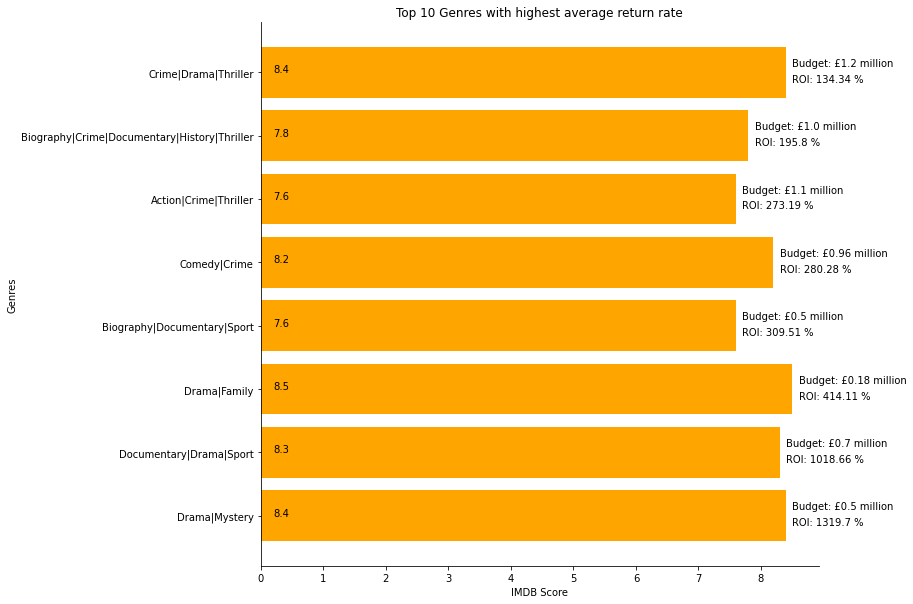

In [21]:
#sorting the average imdb rating, budget and ROI for all movies by genre
topgenreseries=df.groupby('genres')[['imdb_score','budget','return_rate']].mean()
topgenres = topgenreseries[topgenreseries['imdb_score']>7.5]
topgenres = topgenres.sort_values('return_rate',ascending=False)[:10]

#Plotting a barchart of top 10 Genres with highest average return rate
fig, ax = plt.subplots(figsize=(10,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("IMDB Score")
plt.ylabel("Genres")
plt.title("Top 10 Genres with highest average return rate")
y_pos = np.arange(len(topgenres))
plt.barh(y_pos, topgenres['imdb_score'], color = "orange")
plt.yticks(y_pos, topgenres.index)
x_pos = topgenres['imdb_score'].values
label1 =  np.around(topgenres['budget'].values, decimals=2)
label2 =  np.around(topgenres['return_rate'].values, decimals=2)
for i in range(len(y_pos)):
    plt.text(x = 0.2 , y = y_pos[i] , s = str(x_pos[i]), size = 10)
    plt.text(x = x_pos[i] + 0.1 , y = y_pos[i] + 0.1, s = "Budget: £"+str(label1[i])+" million", size = 10)
    plt.text(x = x_pos[i] + 0.1 , y = y_pos[i] - 0.15, s = "ROI: "+str(label2[i])+" %", size = 10)
plt.show()

We have a list of genres with high returns, with **Drama|Mystry** having the highest returns at **1319.7%**.

Analyse directors the same way we analysed genres.

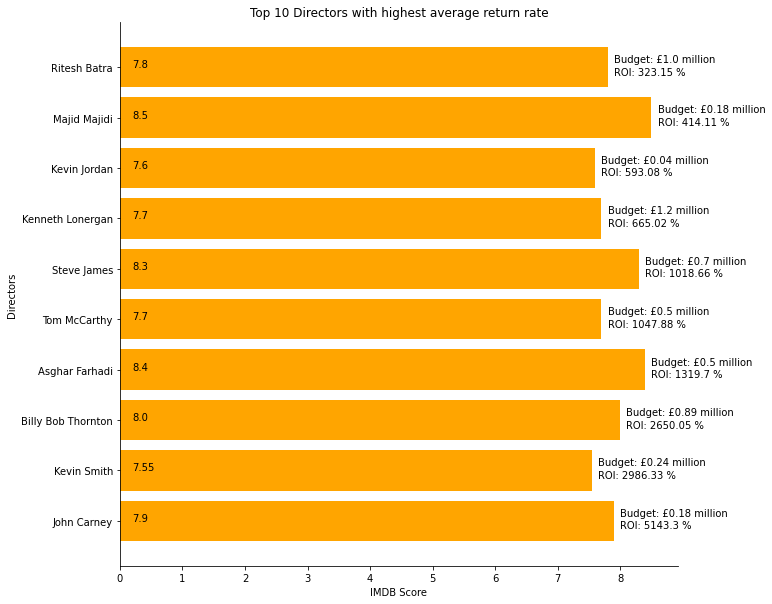

In [22]:
#sorting the average imdb rating, budget and ROI for all movies by directors
topdirectorseries=df.groupby('director_name')[['imdb_score','budget','return_rate']].mean()
topdirectors = topdirectorseries[topdirectorseries['imdb_score']>7.5]
topdirectors = topdirectors.sort_values('return_rate',ascending=False)[:10]

#Plotting a barchart of top 10 Directors with highest average return rate
fig, ax = plt.subplots(figsize=(10,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("IMDB Score")
plt.ylabel("Directors")
plt.title("Top 10 Directors with highest average return rate")
y_pos = np.arange(len(topdirectors))
plt.barh(y_pos, topdirectors['imdb_score'], color = "orange")
plt.yticks(y_pos, topdirectors.index)
x_pos = topdirectors['imdb_score'].values
label1 =  np.around(topdirectors['budget'].values, decimals=2)
label2 =  np.around(topdirectors['return_rate'].values, decimals=2)
for i in range(len(y_pos)):
    plt.text(x = 0.2 , y = y_pos[i] , s = str(x_pos[i]), size = 10)
    plt.text(x = x_pos[i] + 0.1 , y = y_pos[i] + 0.1, s = "Budget: £"+str(label1[i])+" million", size = 10)
    plt.text(x = x_pos[i] + 0.1 , y = y_pos[i] - 0.15, s = "ROI: "+str(label2[i])+" %", size = 10)
plt.show()

We have a list of directors with high returns, with **John Carney** having the highest returns at **5143.3%**.

### Hypothesis Testing

**Hypothesis 1:** If a movie is releasd in USA, then it likely to have a higher rate of ROI.

**Null Hypothesis:** There is no difference between mean ROI of movies released at USA and other countries.

**Alternative Hypothesis:** The mean ROI of movie released at USA is greater than the mean ROI of movie released at other countries.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**H<sub>o</sub>: µ<sub>USA</sub> = µ<sub>others</sub>** &emsp;&emsp;&emsp;&emsp;**H<sub>a</sub>: µ<sub>USA</sub> > µ<sub>others</sub>**

In [23]:
#importing scipy for calculating p-value
import scipy.stats as stats
import random

#filtering USA ROI data.
usa_roi = list(df['return_rate'][df['country'] == "USA"])
#concatenating other countries ROI data.
others_roi = df['return_rate'][df['country'] != "USA"]

random.seed(642) #setting a random seed so that findings can be reproduced
usa_roi = random.sample(usa_roi,len(others_roi)) #taking random samples from usa_roi of the same length as ohters_roi

#getting p-value from the t-test on 2 populations, with a population size < 30.
p_value = stats.ttest_ind(usa_roi, others_roi, equal_var=False, alternative="greater")[1]
print(f'one-tail p-value from scipy: {p_value}')

one-tail p-value from scipy: 0.04801704514360209


At significance level of 0.05 we **accept the alternative hypothesis** as p-value<0.05, concluding that movie released in USA is more likely to get higher returns.

**Hypothesis 2:** If viewers interaction for a movie is higher, then it likely to have a greater rate of ROI.

**Null Hypothesis:** There is no correlation between the viewers interaction for a movie and its ROI.

**Alternative Hypothesis:** The viewers interaction for a movie is positively correlated with its ROI.


In [24]:
#Performing t-test on ROI associated with the factors 'num_voted_users', 'num_critic_for_reviews', and 'num_user_for_reviews'
#as these factors represent the viewers interaction for a movie.

#filtering ROI data by greater than the mean of number of voted users.
high_voted_users_roi = list(df['return_rate'][df['num_voted_users'] >= df['num_voted_users'].mean()])
if len(high_voted_users_roi) > 30:
    random.seed(642)
    high_voted_users_roi = random.sample(high_voted_users_roi,30) 
#getting p-value from the t-test, with a population size < 30. Where popmean is the population mean
p_value = stats.ttest_1samp(high_voted_users_roi,popmean=df.return_rate.mean(), alternative="greater")[1]
print(f'one-tail p-value from scipy: {p_value}')

#filtering ROI data by greater than the mean of number of critic for reviews.
high_critic_reviews_roi = list(df['return_rate'][df['num_critic_for_reviews'] >= df['num_critic_for_reviews'].mean()])
if len(high_critic_reviews_roi) > 30:
    random.seed(642)
    high_critic_reviews_roi = random.sample(high_critic_reviews_roi,30) 
#getting p-value from the t-test, with a population size < 30. Where popmean is the population mean
p_value = stats.ttest_1samp(high_critic_reviews_roi,popmean=df.return_rate.mean(), alternative="greater")[1]
print(f'one-tail p-value from scipy: {p_value}')

#filtering ROI data by greater than the mean of number of voted users.
high_user_reviews_roi = list(df['return_rate'][df['num_user_for_reviews'] >= df['num_user_for_reviews'].mean()])
if len(high_user_reviews_roi) > 30:
    random.seed(642)
    high_user_reviews_roi = random.sample(high_user_reviews_roi,30) 
#getting p-value from the t-test, with a population size < 30. Where popmean is the population mean
p_value = stats.ttest_1samp(high_user_reviews_roi,popmean=df.return_rate.mean(), alternative="greater")[1]
print(f'one-tail p-value from scipy: {p_value}')

one-tail p-value from scipy: 0.20532596044412976
one-tail p-value from scipy: 0.3194282186692703
one-tail p-value from scipy: 0.20203146538596856


At significance level of 0.05 we **fail to reject the null hypothesis** as p-value>0.05, concluding that there is no correlation between the viewers interaction for a movie and its ROI.

**Hypothesis 3:** If IMDB rating for a movie is higher, then it likely to have a greater rate of ROI.

**Null Hypothesis:** There is no correlation between the IMDB rating for a movie and its ROI.

**Alternative Hypothesis:** The IMDB rating for a movie is positively correlated with its ROI.

In [25]:
#filtering ROI data by greater than equal to 7 imdb rating for a movie.
high_imdb_roi = list(df['return_rate'][df['imdb_score'] >= 7])
if len(high_imdb_roi) > 30:
    random.seed(642)
    high_imdb_roi = random.sample(high_imdb_roi,30) 
#getting p-value from the t-test, with a population size < 30. Where popmean is the population mean
p_value = stats.ttest_1samp(high_imdb_roi,popmean=df.return_rate.mean(), alternative="greater")[1]
print(f'one-tail p-value from scipy: {p_value}')

one-tail p-value from scipy: 0.652742000048556


At significance level of 0.05 we **fail to reject the null hypothesis** as p-value>0.05, concluding that there is no correlation between the IMDB ratings for a movie and its ROI.

# Summary

To unravelling the formula for creating a box office hit movie, analysis was done on the IMDB dataset. We used pre-processing techniques like cleaning, munging, and restructuring before performing explanatory data analysis and hypothesis testing to recommend movie with higher returns.

According to the EDA, which involved plotting the relationship between the rate of ROI and factors such as "duration", "countries", "genre", "directors", "imdb-score", and "budget", we could suggest that a movie with a duration of 80 to 90 minutes, a genre of Drama and Mystry, and directed by John Carney will have a higher return rate of ROI. Based on the hypothesis testing, a movie released in the USA will increase the likelihood of a larger ROI. Whereas, drawing more viewers or good IMDB ratings has no significant effect on the revenue. 

Performing several statistical significance tests and EDAs on films with budgets under £1.5 million and good returns, I've come to the conclusion that a John Carney-directed drama|mystry with an 80 to 90-minute running time that will be released in the USA will be profitable for Sussex Budget Productions.